In [48]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
import pandas as pd
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!mkdir -p "/content/drive/My Drive/MNIST_Digit_Classification_models"

In [50]:
#Loading in dataset

(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [51]:
#Normalizing inputs 
x_train, x_test  = x_train / 255., x_test / 255.

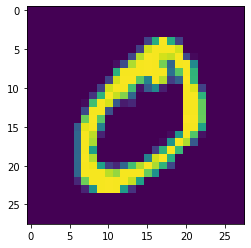

In [52]:
#Looking at our data

image_index = 1
plt.imshow(x_train[image_index])

In [70]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [71]:
#Dimensions of matrices

print("X_train shape", x_train.shape)
print("X_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)
y_train shape (60000,)
y_test shape (10000,)


In [72]:
print(y_train[4])

9


In [82]:
#Designing the neural network architecture 

def conv_model(input_shape):

  model_input = tf.keras.Input(shape = input_shape)
  Z1 = tfl.Conv2D(filters = 5, kernel_size = (2, 2), padding = 'same', strides = (1, 1))(model_input)
  Z1 = tfl.BatchNormalization()(Z1)
  A1 = tfl.ReLU()(Z1)
  A1 = tfl.BatchNormalization()(A1)
  P1 = tfl.MaxPool2D(pool_size = (2, 2), padding = 'same', strides = (2, 2))(A1)
  P1 = tfl.Dropout(0.25)(P1)

  # Z2 = tfl.Conv2D(filters = 10, kernel_size = (2, 2), padding = 'same', strides = (1, 1))(P1)
  # Z2 = tfl.BatchNormalization()(Z2)
  # A2 = tfl.ReLU()(Z2)
  # A2 = tfl.BatchNormalization()(A2)
  # P2 = tfl.MaxPool2D(pool_size = (2, 2), padding = 'same', strides = (2, 2))(A2)
  # P2 = tfl.Dropout(0.25)(P2)

  # Z3 = tfl.Conv2D(filters = 128, kernel_size = (2, 2), padding = 'same', strides = (1, 1))(P2)
  # Z3 = tfl.BatchNormalization()(Z3)
  # A3 = tfl.ReLU()(Z3)
  # A3 = tfl.BatchNormalization()(A3)
  # P3 = tfl.MaxPool2D(pool_size = (2, 2), padding = 'same', strides = (2, 2))(A3)

  # Z4 = tfl.Conv2D(filters = 256, kernel_size = (2, 2), padding = 'same', strides = (1, 1))(P3)
  # Z4 = tfl.BatchNormalization()(Z4)
  # A4 = tfl.ReLU()(Z4)
  # A4 = tfl.BatchNormalization()(A4)
  # P4 = tfl.MaxPool2D(pool_size = (2, 2), padding = 'same', strides = (2, 2))(A4)

  F = tfl.Flatten()(P1)
  D1 = tfl.Dense(units = 100, activation = 'relu')(F)
  outputs = tfl.Dense(units = 10, activation = 'softmax')(D1)
  model = tf.keras.Model(inputs = model_input, outputs = outputs)
  return model
                               

In [83]:
#Compiling the model 

model = conv_model((28, 28, 1))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [84]:
#Training the model

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

history = model.fit(train_dataset, epochs = 4, validation_data = test_dataset)

Epoch 1/4
938/938 [==============================] - 40s 42ms/step - loss: 0.2694 - accuracy: 0.9176 - val_loss: 0.1423 - val_accuracy: 0.9520
Epoch 2/4
938/938 [==============================] - 39s 41ms/step - loss: 0.1194 - accuracy: 0.9627 - val_loss: 0.0894 - val_accuracy: 0.9706
Epoch 3/4
938/938 [==============================] - 41s 43ms/step - loss: 0.0914 - accuracy: 0.9717 - val_loss: 0.0707 - val_accuracy: 0.9765
Epoch 4/4
938/938 [==============================] - 39s 42ms/step - loss: 0.0735 - accuracy: 0.9762 - val_loss: 0.0771 - val_accuracy: 0.9749


In [87]:
model.save("/content/drive/My Drive/MNIST_Digit_Classification_models/model2.h5")